In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv


<div style="color:white;background-color:Orange;padding:3%;border-radius:150px 150px;font-size:2.5em;text-align:center">Beginners Guide to Pipeline in Machine Learning</div>

![](https://www.vistrails.org/usersguide/dev/html/_images/pipeline_gridsearch.png)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler,MaxAbsScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
    

import warnings
warnings.filterwarnings("ignore")

In [3]:
loan = pd.read_csv("../input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv")
loan = loan.drop('Loan_ID',axis=1)
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [6]:
loan.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

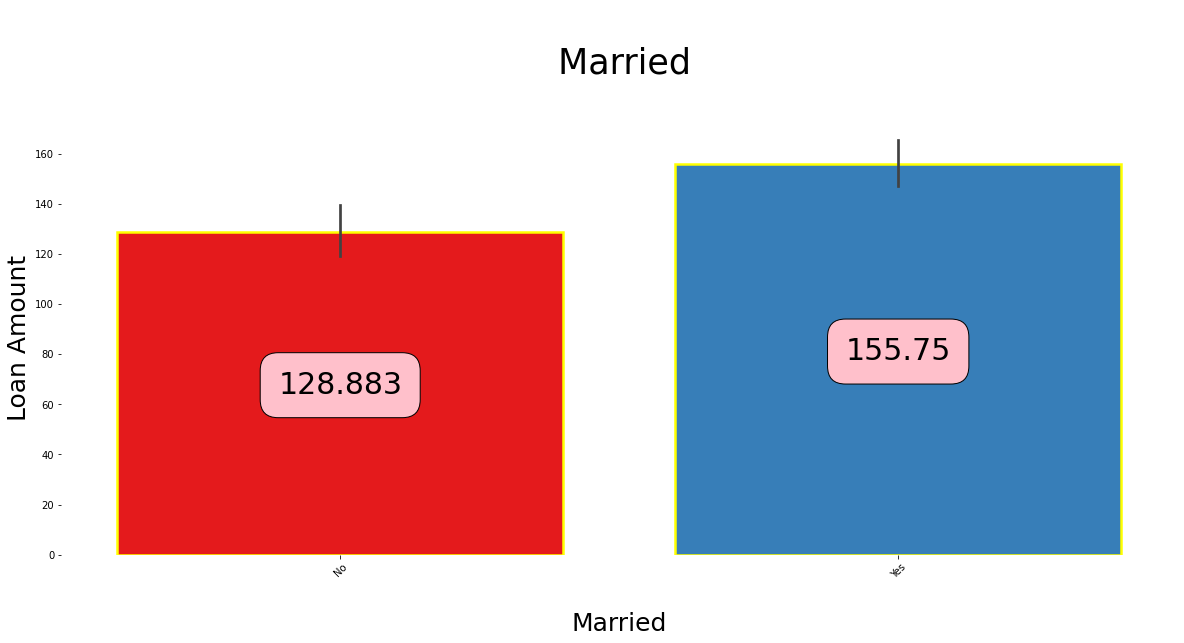

In [7]:
plt.subplots(figsize=(20,8))
p = sns.barplot(x=loan["Married"],y=loan["LoanAmount"],palette="Set1", saturation=2, edgecolor = "yellow", linewidth = 2.5,)
p.axes.set_title("\n Married\n", fontsize=35)
plt.ylabel("Loan Amount" , fontsize = 25)
plt.xlabel("\nMarried" , fontsize = 25)
# plt.yscale("log")
plt.xticks(rotation = 45)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 8,size = 30,color = "black",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "pink", "edgecolor": "black", "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

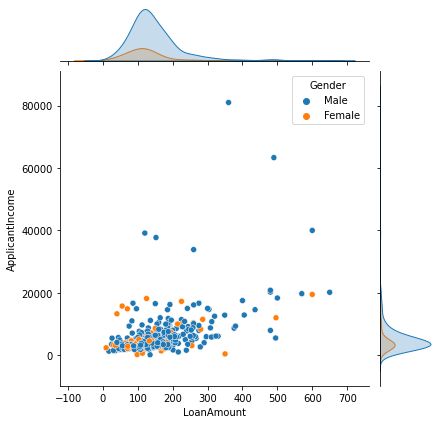

In [8]:
sns.jointplot(data=loan, x="LoanAmount", y="ApplicantIncome", hue="Gender");

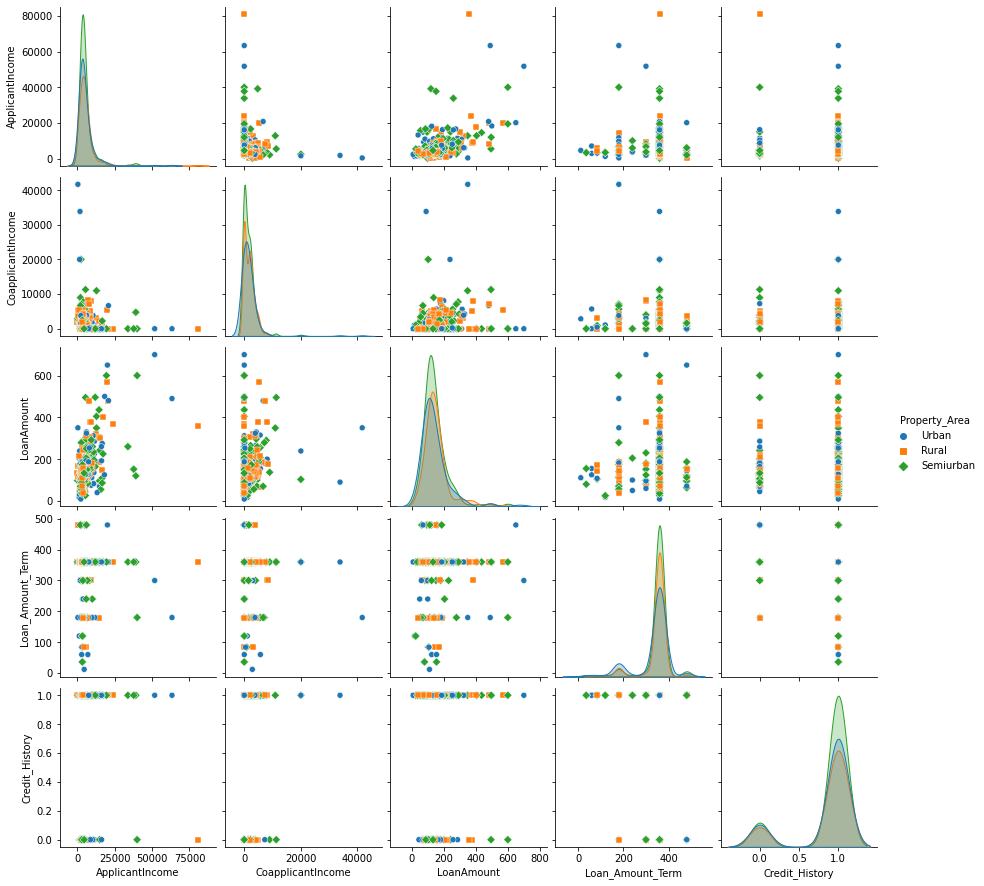

In [9]:
sns.pairplot(loan, hue="Property_Area", markers=["o", "s", "D"]);

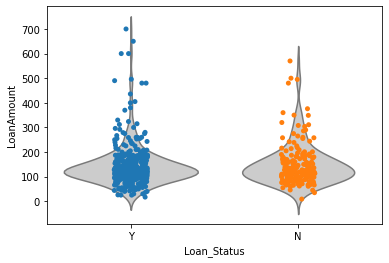

In [10]:
ax = sns.violinplot(x="Loan_Status", y="LoanAmount", data=loan,inner=None, color=".8")
ax = sns.stripplot(x="Loan_Status", y="LoanAmount", data=loan)

<Figure size 1152x360 with 0 Axes>

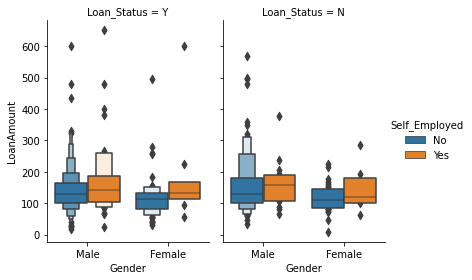

In [11]:
plt.figure(figsize=(16,5))
g = sns.catplot(x="Gender", y="LoanAmount", hue="Self_Employed", col="Loan_Status",data=loan, kind="boxen", height=4, aspect=.7);

<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">Pipeline 🔀</span>

> **Sequentially apply a list of transforms and a final estimator. Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods. The final estimator only needs to implement fit. The transformers in the pipeline can be cached using memory argument.**

> **The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. For this, it enables setting parameters of the various steps using their names and the parameter name separated by a '__', as in the example below. A step’s estimator may be replaced entirely by setting the parameter with its name to another estimator, or a transformer removed by setting it to 'passthrough' or None.**

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:Orange;
           font-size:33px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 15px;
              color:white;">
            <b>Step by Step Sci-kit Learn Pipeline</b>
        </p>
</div>

<font color="Brown" size=+1.5><b>Most of the data science projects (as keen as I am to say all of them) require a certain level of data cleaning and preprocessing to make the most of the machine learning models. Some common preprocessing or transformations are:
</b></font>

<div style="font-family: Lucida Calligraphy; line-height:2; color: Brown; text-align: justify">
    <ol start="1">
        <li> <b>Imputing missing values</b>,</li>
        <li> <b>Removing outliers</b>,</li>
        <li> <b>Normalising or standardising numerical features</b>,</li>
        <li> <b>Encoding categorical features</b>,</li>
    </ol>
</div>

> **Sci-kit learn has a bunch of functions that support this kind of transformation, such as StandardScaler, SimpleImputer…etc, under the preprocessing package.**

<div style="font-family: Lucida Calligraphy; line-height:2; color: Brown; text-align: justify">
    ✅ A typical and simplified data science workflow would like:
    <ol start="1">
        <li> <b>Get the training data</b>,</li>
        <li> <b>Clean/preprocess/transform the data</b>,</li>
        <li> <b>Train a machine learning model</b>,</li>
        <li> <b>Evaluate and optimise the model</b>,</li>
        <li> <b>Clean/preprocess/transform new data</b>,</li>
        <li> <b>Fit the model on new data to make predictions.</b>,</li>
    </ol>
</div>

<font color="Brown" size=+1.5 face="Comic Sans MS">You may notice that data preprocessing has to be done at least twice in the workflow. As tedious and time-consuming as this step is, how nice it would be if only we could automate this process and apply it to all of the future new datasets.</font>


<font color="Brown" size=+1.5 face="Comic Sans MS">The good news is: YES, WE ABSOLUTELY CAN! With the scikit learn pipeline, we can easily systemise the process and therefore make it extremely reproducible. Following I’ll walk you through the process of using scikit learn pipeline to make your life easier.</font>

In [12]:
# Step 1 -> train/test/split
X_train,X_test,y_train,y_test = train_test_split(loan.drop(columns=['Loan_Status']),
                                                 loan['Loan_Status'],
                                                 test_size=0.2,
                                                random_state=42)

In [13]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
83,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban
90,Male,Yes,0,Graduate,No,2958,2900.0,131.0,360.0,1.0,Semiurban
227,Male,Yes,2,Graduate,No,6250,1695.0,210.0,360.0,1.0,Semiurban
482,Male,Yes,0,Graduate,No,2083,3150.0,128.0,360.0,1.0,Semiurban
464,Male,No,0,Graduate,No,4166,0.0,98.0,360.0,0.0,Semiurban


In [14]:
y_train.sample(5)

369    N
514    N
298    N
537    Y
561    Y
Name: Loan_Status, dtype: object

<h1 style="color:Orange;font-size:45px;font-family:Georgia;text-align:center;"> 📚 <strong style="color:Orange;font-size:40px;font-family:serif;"> Decission Tree Classifier </strong> 📚 </h1>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5F1666;
           font-size:20px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 15px;
              color:white;">
            <b>Create the pipeline</b>
        </p>

<font color="Brown" size=+1.5 face="Comic Sans MS">The main parameter of a pipeline we’ll be working on is ‘steps’. From the documentation, it is a ‘list of (name, transform) tuples (implementing fit/transform) that are chained, in the order in which they are chained, with the last object an estimator.’</font>

In [15]:
num_var_mean = ['LoanAmount']
num_var_mostfrequent = ['Loan_Amount_Term','Gender','Married','Self_Employed','Credit_History','Dependents']
num_no_missingvalue = ['Education','ApplicantIncome','CoapplicantIncome','Property_Area','Loan_Status']

num_var_meanimputer = Pipeline(steps=[("imputer",SimpleImputer(strategy='mean'))])
num_var_most_frequent = Pipeline(steps=[("imputer",SimpleImputer(strategy='most_frequent'))])

In [16]:
# imputation transformer
trf1 = ColumnTransformer([("mean_imputer", num_var_meanimputer, num_var_mean),
                        ("most_frequent_imputer", num_var_most_frequent, num_var_mostfrequent)
    
],remainder='passthrough')

In [17]:
# one hot encoding
trf2 = ColumnTransformer([
    ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,1,3,4,10])
],remainder='passthrough')

In [18]:
# Scaling
trf3 = ColumnTransformer([
    ('scale',RobustScaler(),slice(0,20))
])

In [19]:
# Feature selection
trf4 = SelectKBest(score_func=chi2,k=8)

In [20]:
# train the model
trf5 = DecisionTreeClassifier()

In [21]:
pipe_dec = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4),
    ('trf5',trf5)
])

In [22]:
# Code here
pipe_dec.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('mean_imputer',
                                  Pipeline(steps=[('imputer', SimpleImputer())]),
                                  ['LoanAmount']),
                                 ('most_frequent_imputer',
                                  Pipeline(steps=[('imputer',
                                                   SimpleImputer(strategy='most_frequent'))]),
                                  ['Loan_Amount_Term', 'Gender', 'Married',
                                   'Self_Employed', 'Credit_History',
                                   'Dependents'])]),
 'trf2': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  [0, 1, 3, 4, 10])]),
 'trf3': ColumnTransformer(transformers=[('scale', RobustScaler(),

In [23]:
# Display Pipeline

from sklearn import set_config
set_config(display='diagram')

In [24]:
# train
pipe_dec.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('mean_imputer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['LoanAmount']),
                                                 ('most_frequent_imputer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Loan_Amount_Term', 'Gender',
                                                   'Married', 'Self_Employed',
                                                   'Credit_History',
                                                   'Dependents'])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 3, 4, 10])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', RobustScaler(),
                                                  slice(0, 20, None))])),
                ('trf4',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x7f3d2dac2830>)),
                ('trf5', DecisionTreeClassifier())])

In [25]:
# Predict
y_pred = pipe_dec.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score: ",accuracy_score(y_test,y_pred).round(2)*100,"%")

Accuracy Score:  65.0 %


In [26]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score

print("cross_val_score     : ",cross_val_score(pipe_dec, X_train, y_train, cv=5, scoring='accuracy').round(3)*100,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("cross_val_score mean: ",cross_val_score(pipe_dec, X_train, y_train, cv=5, scoring='accuracy').mean().round(2)*100,"%")

cross_val_score     :  [69.7 69.4 69.4 69.4 69.4] %
--------------------------------------------------------
cross_val_score mean:  69.0 %


In [27]:
# gridsearchcv
params = {
    'trf5__max_depth':[1,2,3,4,5,None]
}

from sklearn.model_selection import GridSearchCV
grid_dec = GridSearchCV(pipe_dec, params, cv=5, scoring='accuracy')

In [28]:
grid_dec.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('mean_imputer',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['LoanAmount']),
                                                                        ('most_frequent_imputer',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['Loan_Amount_Term',
                                                                          'Gender',
                                                                          'Married',
                                                                          'Self_Employed',
                                                                          'Credit_Histor...
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         [0, 1,
                                                                          3, 4,
                                                                          10])])),
                                       ('trf3',
                                        ColumnTransformer(transformers=[('scale',
                                                                         RobustScaler(),
                                                                         slice(0, 20, None))])),
                                       ('trf4',
                                        SelectKBest(k=8,
                                                    score_func=<function chi2 at 0x7f3d2dac2830>)),
                                       ('trf5', DecisionTreeClassifier())]),
             param_grid={'trf5__max_depth': [1, 2, 3, 4, 5, None]},
             scoring='accuracy')

In [29]:
print("Grid Best Score: ", grid_dec.best_score_.round(2)*100,"%")

Grid Best Score:  70.0 %


In [30]:
print("Grid Best Parameter: ", grid_dec.best_params_)

Grid Best Parameter:  {'trf5__max_depth': 1}


In [31]:
### Using the best parameters from the grid-search.
dec_grid = grid_dec.best_estimator_

decision_train_grid = round(dec_grid.score(X_train, y_train) * 100, 2)
decision_accuracy_grid = dec_grid.score(X_train,y_train).round(2)*100

print("Training Accuracy with GridSearch :",decision_train_grid  ,"%")
print("Model Accuracy with GridSearch    :",decision_accuracy_grid ,"%")

Training Accuracy with GridSearch : 69.86 %
Model Accuracy with GridSearch    : 70.0 %


<h1 style="color:Orange;font-size:45px;font-family:Georgia;text-align:center;"> 📚 <strong style="color:Orange;font-size:40px;font-family:serif;"> LogisticRegression Classifier </strong> 📚 </h1>

In [32]:
num_var_mean = ['LoanAmount']
num_var_mostfrequent = ['Loan_Amount_Term','Gender','Married','Self_Employed','Credit_History','Dependents']
num_no_missingvalue = ['Education','ApplicantIncome','CoapplicantIncome','Property_Area','Loan_Status']

num_var_meanimputer = Pipeline(steps=[("imputer",SimpleImputer(strategy='mean'))])
num_var_most_frequent = Pipeline(steps=[("imputer",SimpleImputer(strategy='most_frequent'))])

# imputation transformer
trf1 = ColumnTransformer([("mean_imputer", num_var_meanimputer, num_var_mean),
                        ("most_frequent_imputer", num_var_most_frequent, num_var_mostfrequent)
    
],remainder='passthrough')

# one hot encoding
trf2 = ColumnTransformer([
    ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,1,3,4,10])
],remainder='passthrough')

# Scaling
trf3 = ColumnTransformer([
    ('scale',RobustScaler(),slice(0,20))
])

# Feature selection
trf4 = SelectKBest(score_func=chi2,k=8)

# train the model
trf5 = LogisticRegression()  

pipe_lr = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4),
    ('trf5',trf5)
])

In [33]:
# Code here
pipe_lr.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('mean_imputer',
                                  Pipeline(steps=[('imputer', SimpleImputer())]),
                                  ['LoanAmount']),
                                 ('most_frequent_imputer',
                                  Pipeline(steps=[('imputer',
                                                   SimpleImputer(strategy='most_frequent'))]),
                                  ['Loan_Amount_Term', 'Gender', 'Married',
                                   'Self_Employed', 'Credit_History',
                                   'Dependents'])]),
 'trf2': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  [0, 1, 3, 4, 10])]),
 'trf3': ColumnTransformer(transformers=[('scale', RobustScaler(),

In [34]:
# train
pipe_lr.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('mean_imputer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['LoanAmount']),
                                                 ('most_frequent_imputer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Loan_Amount_Term', 'Gender',
                                                   'Married', 'Self_Employed',
                                                   'Credit_History',
                                                   'Dependents'])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 3, 4, 10])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', RobustScaler(),
                                                  slice(0, 20, None))])),
                ('trf4',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x7f3d2dac2830>)),
                ('trf5', LogisticRegression())])

In [35]:
# Predict
y_pred = pipe_lr.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score: ",accuracy_score(y_test,y_pred).round(2)*100,"%")

Accuracy Score:  65.0 %


In [36]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score

print("cross_val_score     : ",cross_val_score(pipe_lr, X_train, y_train, cv=5, scoring='accuracy').round(3)*100,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("cross_val_score mean: ",cross_val_score(pipe_lr, X_train, y_train, cv=5, scoring='accuracy').mean().round(2)*100,"%")

cross_val_score     :  [69.7 69.4 69.4 69.4 70.4] %
--------------------------------------------------------
cross_val_score mean:  70.0 %


In [37]:
C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,17.5,18,20,25]
penalties = ['l1','l2']

cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25)

param = {'trf5__penalty': penalties, 'trf5__C': C_vals}

logreg = LogisticRegression(solver='liblinear')
## Calling on GridSearchCV object. 
grid_log = GridSearchCV(pipe_lr, 
                           param_grid = param,
                           scoring = 'accuracy',
                           n_jobs =-1,
                           cv = cv
                          )
## Fitting the model
grid_log.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('mean_imputer',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['LoanAmount']),
                                                                        ('most_frequent_imputer',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_...
                                       ('trf3',
                                        ColumnTransformer(transformers=[('scale',
                                                                         RobustScaler(),
                                                                         slice(0, 20, None))])),
                                       ('trf4',
                                        SelectKBest(k=8,
                                                    score_func=<function chi2 at 0x7f3d2dac2830>)),
                                       ('trf5', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'trf5__C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1,
                                     2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15,
                                     16, 16.5, 17, 17.5, 18, 20, 25],
                         'trf5__penalty': ['l1', 'l2']},
             scoring='accuracy')

In [38]:
print("Grid Best Score: ", grid_log.best_score_.round(2)*100,"%")

Grid Best Score:  70.0 %


In [39]:
print("Grid Best Parameter: ", grid_log.best_params_)

Grid Best Parameter:  {'trf5__C': 0.2, 'trf5__penalty': 'l2'}


In [40]:
### Using the best parameters from the grid-search.
log_grid = grid_log.best_estimator_

log_train_grid = round(log_grid.score(X_train, y_train) * 100, 2)
log_accuracy_grid =log_grid.score(X_train,y_train).round(2)*100

print("Training Accuracy with GridSearch :",log_train_grid  ,"%")
print("Model Accuracy with GridSearch    :",log_accuracy_grid ,"%")

Training Accuracy with GridSearch : 69.65 %
Model Accuracy with GridSearch    : 70.0 %


<h1 style="color:Orange;font-size:45px;font-family:Georgia;text-align:center;"> 📚 <strong style="color:Orange;font-size:40px;font-family:serif;"> AdaBoostClassifier </strong> 📚 </h1>

In [41]:
num_var_mean = ['LoanAmount']
num_var_mostfrequent = ['Loan_Amount_Term','Gender','Married','Self_Employed','Credit_History','Dependents']
num_no_missingvalue = ['Education','ApplicantIncome','CoapplicantIncome','Property_Area','Loan_Status']

num_var_meanimputer = Pipeline(steps=[("imputer",SimpleImputer(strategy='mean'))])
num_var_most_frequent = Pipeline(steps=[("imputer",SimpleImputer(strategy='most_frequent'))])

# imputation transformer
trf1 = ColumnTransformer([("mean_imputer", num_var_meanimputer, num_var_mean),
                        ("most_frequent_imputer", num_var_most_frequent, num_var_mostfrequent)
    
],remainder='passthrough')

# one hot encoding
trf2 = ColumnTransformer([
    ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,1,3,4,10])
],remainder='passthrough')

# Scaling
trf3 = ColumnTransformer([
    ('scale',RobustScaler(),slice(0,20))
])

# Feature selection
trf4 = SelectKBest(score_func=chi2,k=8)

# train the model
trf5 = AdaBoostClassifier()

pipe_ada = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4),
    ('trf5',trf5)
])

In [42]:
# Code here
pipe_ada.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('mean_imputer',
                                  Pipeline(steps=[('imputer', SimpleImputer())]),
                                  ['LoanAmount']),
                                 ('most_frequent_imputer',
                                  Pipeline(steps=[('imputer',
                                                   SimpleImputer(strategy='most_frequent'))]),
                                  ['Loan_Amount_Term', 'Gender', 'Married',
                                   'Self_Employed', 'Credit_History',
                                   'Dependents'])]),
 'trf2': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  [0, 1, 3, 4, 10])]),
 'trf3': ColumnTransformer(transformers=[('scale', RobustScaler(),

In [43]:
# train
pipe_ada.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('mean_imputer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['LoanAmount']),
                                                 ('most_frequent_imputer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Loan_Amount_Term', 'Gender',
                                                   'Married', 'Self_Employed',
                                                   'Credit_History',
                                                   'Dependents'])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 3, 4, 10])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', RobustScaler(),
                                                  slice(0, 20, None))])),
                ('trf4',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x7f3d2dac2830>)),
                ('trf5', AdaBoostClassifier())])

In [44]:
# Predict
y_pred = pipe_ada.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score: ",accuracy_score(y_test,y_pred).round(2)*100,"%")

Accuracy Score:  65.0 %


In [45]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score

print("cross_val_score     : ",cross_val_score(pipe_ada, X_train, y_train, cv=5, scoring='accuracy').round(3)*100,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("cross_val_score mean: ",cross_val_score(pipe_ada, X_train, y_train, cv=5, scoring='accuracy').mean().round(2)*100,"%")

cross_val_score     :  [69.7 69.4 69.4 69.4 69.4] %
--------------------------------------------------------
cross_val_score mean:  69.0 %


In [46]:
n_estimators = [100,140,145,150,160, 170,175,180,185];
learning_r = [0.1,1,0.01,0.5]

parameters = {'trf5__n_estimators':n_estimators,
              'trf5__learning_rate':learning_r
              
        }

cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
grid_ada = GridSearchCV(pipe_ada,
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid_ada.fit(X_train,y_train) 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('mean_imputer',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['LoanAmount']),
                                                                        ('most_frequent_imputer',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_fre...
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         [0, 1,
                                                                          3, 4,
                                                                          10])])),
                                       ('trf3',
                                        ColumnTransformer(transformers=[('scale',
                                                                         RobustScaler(),
                                                                         slice(0, 20, None))])),
                                       ('trf4',
                                        SelectKBest(k=8,
                                                    score_func=<function chi2 at 0x7f3d2dac2830>)),
                                       ('trf5', AdaBoostClassifier())]),
             n_jobs=-1,
             param_grid={'trf5__learning_rate': [0.1, 1, 0.01, 0.5],
                         'trf5__n_estimators': [100, 140, 145, 150, 160, 170,
                                                175, 180, 185]})

In [47]:
print("Grid Best Score: ", grid_ada.best_score_.round(2)*100,"%")

Grid Best Score:  69.0 %


In [48]:
print("Grid Best Parameter: ", grid_ada.best_params_)

Grid Best Parameter:  {'trf5__learning_rate': 0.1, 'trf5__n_estimators': 100}


In [49]:
### Using the best parameters from the grid-search.
ada_grid = grid_ada.best_estimator_

ada_train_grid = round(ada_grid.score(X_train, y_train) * 100, 2)
ada_accuracy_grid =ada_grid.score(X_train,y_train).round(2)*100

print("Training Accuracy with GridSearch :",ada_train_grid  ,"%")
print("Model Accuracy with GridSearch    :",ada_accuracy_grid ,"%")

Training Accuracy with GridSearch : 70.47 %
Model Accuracy with GridSearch    : 70.0 %


<h1 style="color:Orange;font-size:45px;font-family:Georgia;text-align:center;"> 📚 <strong style="color:Orange;font-size:40px;font-family:serif;"> BaggingClassifier </strong> 📚 </h1>

In [50]:
num_var_mean = ['LoanAmount']
num_var_mostfrequent = ['Loan_Amount_Term','Gender','Married','Self_Employed','Credit_History','Dependents']
num_no_missingvalue = ['Education','ApplicantIncome','CoapplicantIncome','Property_Area','Loan_Status']

num_var_meanimputer = Pipeline(steps=[("imputer",SimpleImputer(strategy='mean'))])
num_var_most_frequent = Pipeline(steps=[("imputer",SimpleImputer(strategy='most_frequent'))])

# imputation transformer
trf1 = ColumnTransformer([("mean_imputer", num_var_meanimputer, num_var_mean),
                        ("most_frequent_imputer", num_var_most_frequent, num_var_mostfrequent)
    
],remainder='passthrough')

# one hot encoding
trf2 = ColumnTransformer([
    ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,1,3,4,10])
],remainder='passthrough')

# Scaling
trf3 = ColumnTransformer([
    ('scale',RobustScaler(),slice(0,20))
])

# Feature selection
trf4 = SelectKBest(score_func=chi2,k=8)

# train the model
trf5 = BaggingClassifier()

pipe_bag = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4),
    ('trf5',trf5)
])

In [51]:
# Code here
pipe_bag.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('mean_imputer',
                                  Pipeline(steps=[('imputer', SimpleImputer())]),
                                  ['LoanAmount']),
                                 ('most_frequent_imputer',
                                  Pipeline(steps=[('imputer',
                                                   SimpleImputer(strategy='most_frequent'))]),
                                  ['Loan_Amount_Term', 'Gender', 'Married',
                                   'Self_Employed', 'Credit_History',
                                   'Dependents'])]),
 'trf2': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  [0, 1, 3, 4, 10])]),
 'trf3': ColumnTransformer(transformers=[('scale', RobustScaler(),

In [52]:
# train
pipe_bag.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('mean_imputer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['LoanAmount']),
                                                 ('most_frequent_imputer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Loan_Amount_Term', 'Gender',
                                                   'Married', 'Self_Employed',
                                                   'Credit_History',
                                                   'Dependents'])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 3, 4, 10])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', RobustScaler(),
                                                  slice(0, 20, None))])),
                ('trf4',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x7f3d2dac2830>)),
                ('trf5', BaggingClassifier())])

In [53]:
# Predict
y_pred = pipe_bag.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score: ",accuracy_score(y_test,y_pred).round(2)*100,"%")

Accuracy Score:  65.0 %


In [54]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score

print("cross_val_score     : ",cross_val_score(pipe_bag, X_train, y_train, cv=5, scoring='accuracy').round(3)*100,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("cross_val_score mean: ",cross_val_score(pipe_bag, X_train, y_train, cv=5, scoring='accuracy').mean().round(2)*100,"%")

cross_val_score     :  [69.7 69.4 69.4 69.4 69.4] %
--------------------------------------------------------
cross_val_score mean:  69.0 %


In [55]:
from sklearn.ensemble import BaggingClassifier
n_estimators = [10,30,50,70,80,150,160, 170,175,180,185];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

parameters = {'trf5__n_estimators':n_estimators,
              
        }
grid_bag = GridSearchCV(pipe_bag,
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid_bag.fit(X_train,y_train) 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('mean_imputer',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['LoanAmount']),
                                                                        ('most_frequent_imputer',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_fre...
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         [0, 1,
                                                                          3, 4,
                                                                          10])])),
                                       ('trf3',
                                        ColumnTransformer(transformers=[('scale',
                                                                         RobustScaler(),
                                                                         slice(0, 20, None))])),
                                       ('trf4',
                                        SelectKBest(k=8,
                                                    score_func=<function chi2 at 0x7f3d2dac2830>)),
                                       ('trf5', BaggingClassifier())]),
             n_jobs=-1,
             param_grid={'trf5__n_estimators': [10, 30, 50, 70, 80, 150, 160,
                                                170, 175, 180, 185]})

In [56]:
print("Grid Best Score: ", grid_bag.best_score_.round(2)*100,"%")

Grid Best Score:  69.0 %


In [57]:
print("Grid Best Parameter: ", grid_bag.best_params_)

Grid Best Parameter:  {'trf5__n_estimators': 10}


In [58]:
### Using the best parameters from the grid-search.
bag_grid = grid_bag.best_estimator_

bag_train_grid = round(bag_grid.score(X_train, y_train) * 100, 2)
bag_accuracy_grid =bag_grid.score(X_train,y_train).round(2)*100

print("Training Accuracy with GridSearch :",bag_train_grid  ,"%")
print("Model Accuracy with GridSearch    :",bag_accuracy_grid ,"%")

Training Accuracy with GridSearch : 70.47 %
Model Accuracy with GridSearch    : 70.0 %


<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">Reference
</span>


https://towardsdatascience.com/step-by-step-tutorial-of-sci-kit-learn-pipeline-62402d5629b6


https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html